<a href="https://colab.research.google.com/github/larsmoan/COMP3710/blob/main/fractals_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
print("PyTorch Version:", torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} for computation")

PyTorch Version: 2.0.1
Using cpu for computation


In [2]:
def mandelbrot(start: float = 1.9, end: float = 2.6, resolution: float = 0.005):
    Y, X = np.mgrid[-start:start:resolution, -end:end:resolution]
    
    # load into PyTorch tensors
    x = torch.Tensor(X)
    y = torch.Tensor(Y)
    z = torch.complex(x, y) #important! zs = z.clone() #Updated!
    zs = z.clone() #Updated!
    ns = torch.zeros_like(z)

    # transfer to the GPU device
    z = z.to(device)
    zs = zs.to(device)
    ns = ns.to(device)

    for i in range(200):
        #Compute the new values of z: z^2 + c
        zs_ = zs**2 +  z
        #Have we diverged with this new value?
        not_diverged = torch.abs(zs_) < 5
        ns += not_diverged
        zs = zs_

    return ns.cpu().numpy()

In [3]:
def julia(start: float = 2., end: float = 2, resolution: float = 0.005):
    Y, X = np.mgrid[-start:start:resolution, -end:end:resolution]
    
    # load into PyTorch tensors
    x = torch.Tensor(X)
    y = torch.Tensor(Y)
    z = torch.complex(x, y) #important! zs = z.clone() #Updated!
    zs = z.clone() #Updated!
    ns = torch.zeros_like(z)

    # transfer to the GPU device
    z = z.to(device)
    zs = zs.to(device)
    ns = ns.to(device)

    for i in range(200):
        #Compute the new values of z: z^2 + c
        zs_ = zs**2 - 0.8 + 0.156j
        #Have we diverged with this new value?
        not_diverged = torch.abs(zs_) < 5
        ns += not_diverged
        zs = zs_

    return ns.cpu().numpy()

/var/folders/c_/vg1wxx7s1sj4zyt54m8xyx240000gn/T/ipykernel_48149/380266527.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


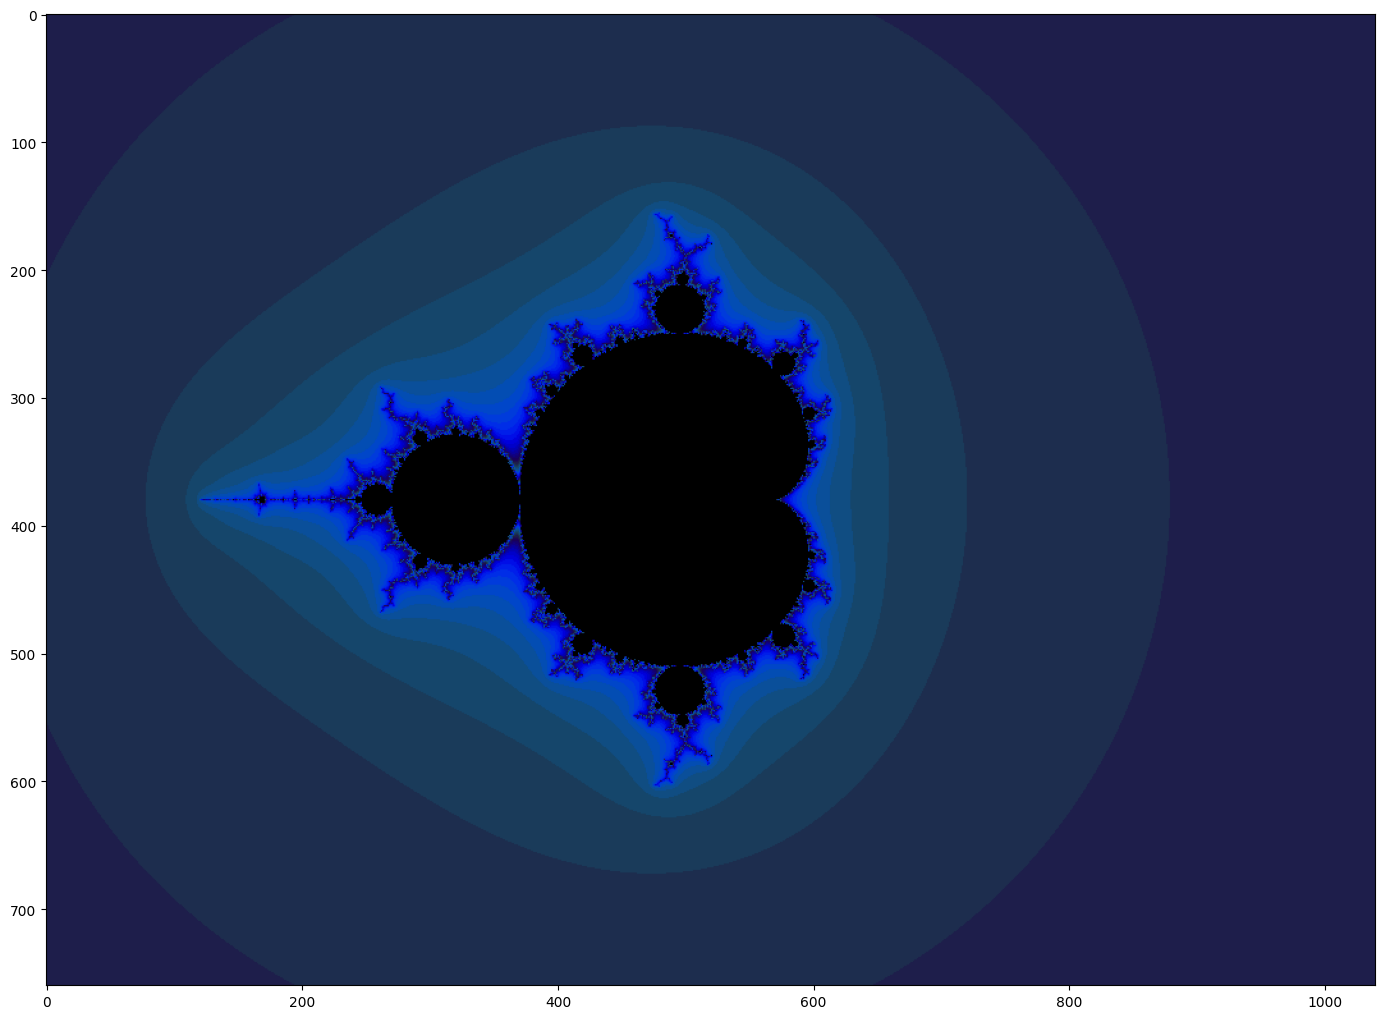

In [4]:
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
                colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(mandelbrot()))
plt.tight_layout(pad=0)
plt.show()

/var/folders/c_/vg1wxx7s1sj4zyt54m8xyx240000gn/T/ipykernel_48149/380266527.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


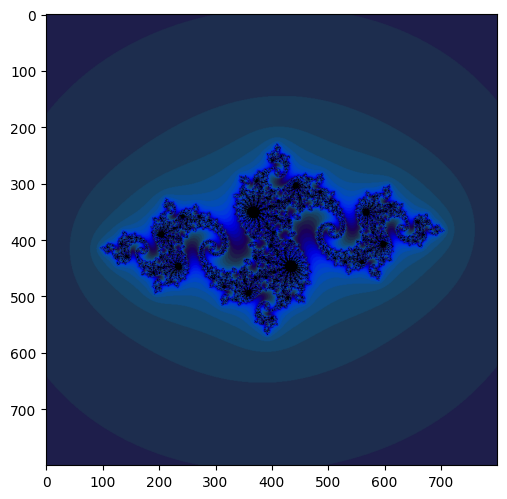

In [5]:
plt.imshow(processFractal(julia()))
plt.tight_layout(pad=0)
plt.show()

In [6]:
import numpy as np
import cv2
def julia_set_video():
    for angle in range(0,2*np.pi):
        c = np.exp(1j*angle)
        z = np.zeros((h,w), dtype=np.complex)
        for i in range(0,h):
            for j in range(0,w):
                z[i,j] = (i-h/2)*1j + (j-w/2)
        for k in range(0,100):
            z = z**2 + c
            z = np.where(np.abs(z) > 2, 0, z)
            img = np.where(z == 0, 0, 255)
            img = np.uint8(img)
            cv2.imshow('julia', img)
            cv2.waitKey(1)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Function to generate Julia set fractal
def julia_set(width, height, max_iterations, c_real, c_imag):
    x = np.linspace(-2, 2, width)
    y = np.linspace(-2, 2, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    fractal = np.zeros((height, width))

    for i in range(max_iterations):
        Z = Z**2 + complex(c_real, c_imag)
        mask = np.abs(Z) < 10
        fractal += mask

    return fractal

# Function to update animation frame
def update(frame):
    plt.clf()
    c_real = np.cos(frame * 0.02)
    c_imag = np.sin(frame * 0.02)
    fractal = julia_set(width, height, max_iterations, c_real, c_imag)
    plt.imshow(fractal, cmap='hot', extent=(-2, 2, -2, 2))
    plt.title(f'Julia Set Frame {frame}')
    plt.axis('off')

# Video parameters
width = 800
height = 800
max_iterations = 100

# Create animation
fig = plt.figure(figsize=(6, 6))
animation = FuncAnimation(fig, update, frames=np.arange(0, 200), interval=50)
plt.show()

<Figure size 600x600 with 0 Axes>